In [ ]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

# Load the image
image_path = 'bp.jpg'
image = cv2.imread(image_path)

# Check if the image is loaded properly
if image is None:
    raise ValueError("Image not found. Please check the path.")

# Convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the scale factors
scale_factor_zoom = 3.0  # Increase the size by 3 times
scale_factor_shrink = 1/3.0  # Decrease the size by 3 times

# Get the original image dimensions
height, width = image_rgb.shape[:2]

# Calculate the new dimensions for zoomed image
new_height_zoom = int(height * scale_factor_zoom)
new_width_zoom = int(width * scale_factor_zoom)

# Resize the image (zoom)
zoomed_image = cv2.resize(src=image_rgb,
                          dsize=(new_width_zoom, new_height_zoom),
                          interpolation=cv2.INTER_CUBIC)

# Calculate the new dimensions for scaled (shrunk) image
new_height_shrink = int(height * scale_factor_shrink)
new_width_shrink = int(width * scale_factor_shrink)

# Resize the image (shrink)
scaled_image = cv2.resize(src=image_rgb,
                          dsize=(new_width_shrink, new_height_shrink),
                          interpolation=cv2.INTER_AREA)

# Crop the image
x, y, w, h = 50, 50, 200, 200  # Define the crop box
cropped_image = image_rgb[y:y+h, x:x+w]

# Rotate the image
center = (width // 2, height // 2)
angle = 45  # Rotation angle
M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image_rgb, M, (width, height))

# Histogram equalization
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
equalized_image = cv2.equalizeHist(image_gray)

# Contrast stretching
min_val = np.min(image_rgb)
max_val = np.max(image_rgb)
stretched_image = (image_rgb - min_val) * (255 / (max_val - min_val))
stretched_image = np.uint8(stretched_image)

# Blurring
blurred_image = cv2.GaussianBlur(image_rgb, (5, 5), 0)

# Sharpening
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])
sharpened_image = cv2.filter2D(image_rgb, -1, kernel)

# Edge Detection
edges_image = cv2.Canny(image_rgb, 100, 200)



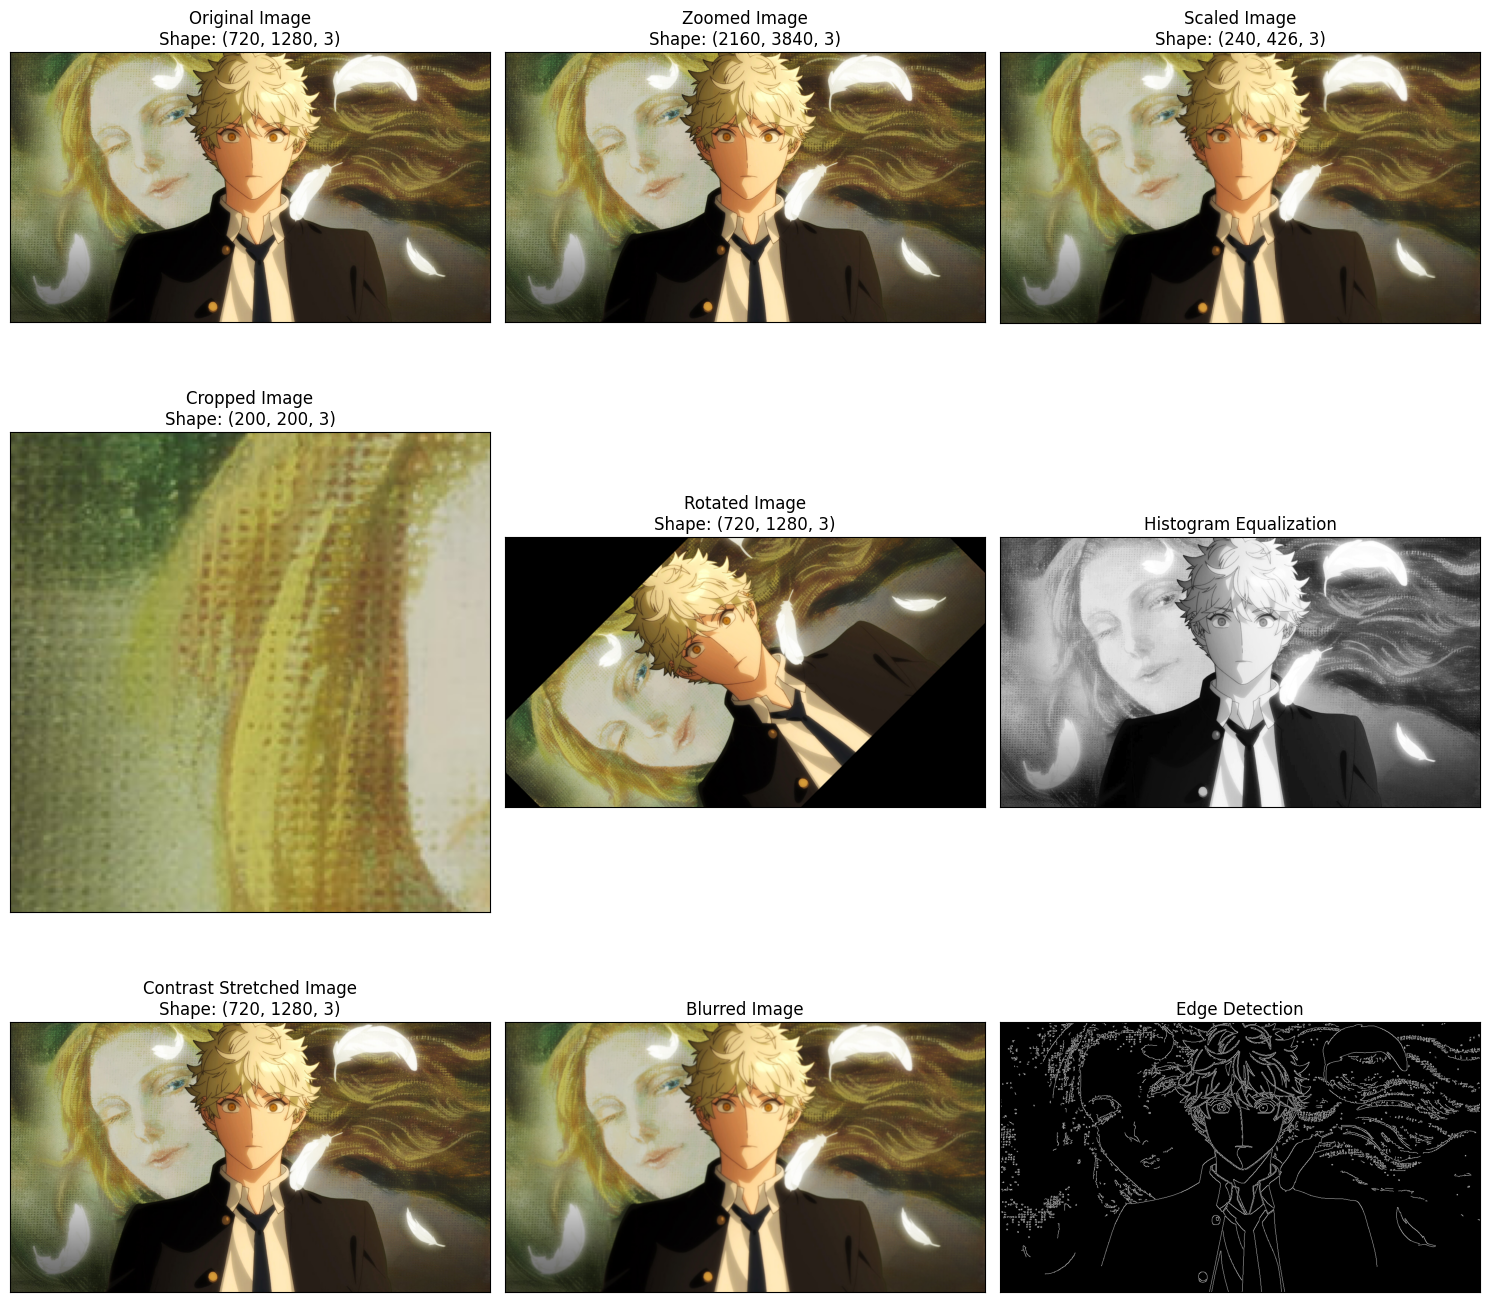

In [ ]:
# Create subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Basic image operations (resizing, cropping, rotating)
# Plot the original image
axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title('Original Image\nShape: {}'.format(image_rgb.shape))

# Plot the zoomed image
axs[0, 1].imshow(zoomed_image)
axs[0, 1].set_title('Zoomed Image\nShape: {}'.format(zoomed_image.shape))

# Plot the scaled image
axs[0, 2].imshow(scaled_image)
axs[0, 2].set_title('Scaled Image\nShape: {}'.format(scaled_image.shape))

# Plot the cropped image
axs[1, 0].imshow(cropped_image)
axs[1, 0].set_title('Cropped Image\nShape: {}'.format(cropped_image.shape))

# Plot the rotated image
axs[1, 1].imshow(rotated_image)
axs[1, 1].set_title('Rotated Image\nShape: {}'.format(rotated_image.shape))

# Image enhancement techniques (histogram equalization, contrast stretching)
# Plot the histogram equalized image
axs[1, 2].imshow(equalized_image, cmap='gray')
axs[1, 2].set_title('Histogram Equalization')

# Plot the contrast stretched image
axs[2, 0].imshow(stretched_image)
axs[2, 0].set_title('Contrast Stretched Image\nShape: {}'.format(stretched_image.shape))

# Filtering techniques (blurring, sharpening, edge detection)
# Plot the blurred image
axs[2, 1].imshow(blurred_image)
axs[2, 1].set_title('Blurred Image')

# Plot the sharpened image
axs[2, 2].imshow(sharpened_image)
axs[2, 2].set_title('Sharpened Image')

# Plot the edge detected image
axs[2, 2].imshow(edges_image, cmap='gray')
axs[2, 2].set_title('Edge Detection')

# Remove ticks from the subplots
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

# Display the subplots
plt.tight_layout()
plt.show()